<h1>Load and Prepare Iris Dataset<h1>

In [ ]:
# Import Libraries and Load Iris Dataset

from sklearn.datasets import load_iris  # Load Iris dataset
import pandas as pd                      # For DataFrame operations

# Load Iris dataset 
iris = load_iris()  # Load the Iris dataset from scikit-learn

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Features as columns
df['target'] = iris.target  # Add target labels as a new column


<h1>Train-Test Split and Standardization<h1>

داده‌های اصلی (قبل از استانداردسازی)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1

داده های استانداردشده (پس از استانداردسازی)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0     

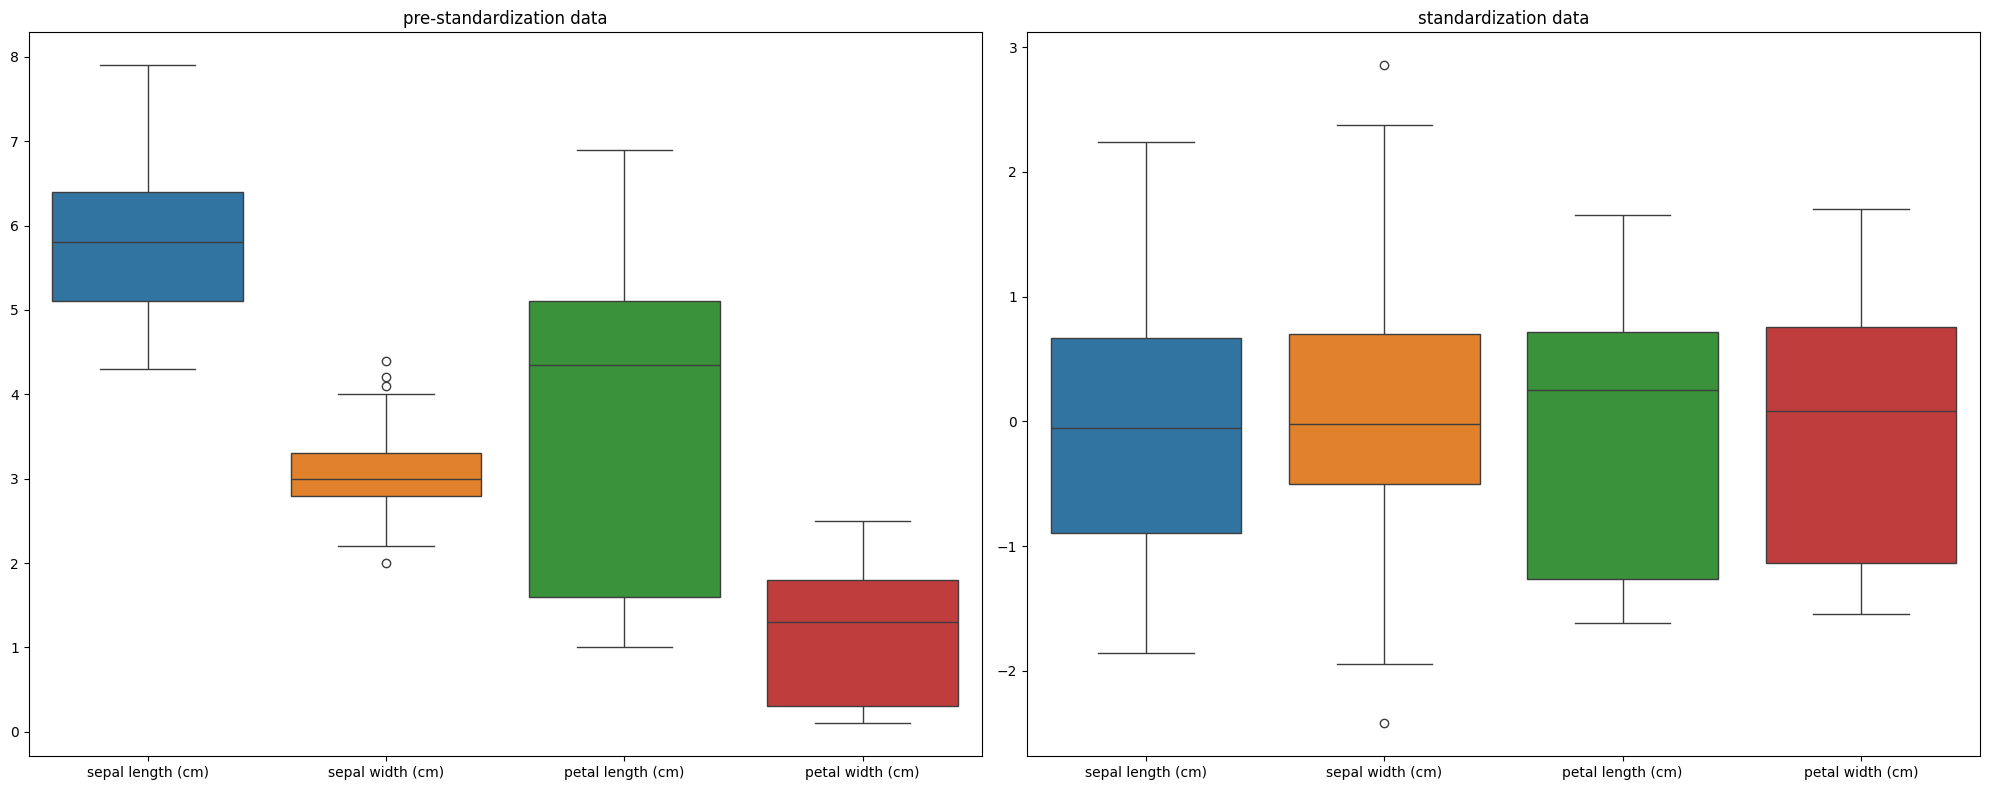

In [ ]:
# Data Splitting, Standardization, and Visualization for Iris Dataset

import matplotlib.pyplot as plt   # For plotting
import seaborn as sns             # For advanced visualization
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.preprocessing import StandardScaler      # Standardization

# Split features and target
X = df.drop(columns=['target'])  # Features
y = df['target']                 # Target labels

# Train-Test Split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize features (for algorithms that require it, e.g., Logistic Regression)
scaler = StandardScaler()
X_train_Standard_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_Standard_scaled = scaler.transform(X_test)        # Transform test data

# Convert standardized arrays to DataFrame 
X_train_scaled = pd.DataFrame(X_train_Standard_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_Standard_scaled, columns=X.columns)

# Keep original data for decision tree (no standardization needed)
X_train_tree = X_train
X_test_tree = X_test

# Display first 10 rows of original and standardized data
print("Original Data (before standardization)")
print(X.head(10))
print("\nStandardized Data (after standardization)")
print(X_train_scaled.head(10))

# Visualize data before and after standardization using boxplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Original data
sns.boxplot(data=X, ax=axes[0])
axes[0].set_title("Pre-standardization Data")

# Standardized data
sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title("Standardized Data")

plt.tight_layout()
plt.show()


<h1>Decision Tree and Logistic Regression Classification<h1>

In [ ]:
# Decision Tree and Logistic Regression Classification on Iris Dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Decision Tree Model
DecisionTree = DecisionTreeClassifier(random_state=42)  # Initialize Decision Tree
DecisionTree.fit(X_train, y_train)                      # Train on training data
y_predict_DecisionTree = DecisionTree.predict(X_test)  # Predict on test data

# Evaluate Decision Tree
DecisionTree_report = classification_report(y_test, y_predict_DecisionTree, output_dict=True)
DecisionTree_accuracy = accuracy_score(y_test, y_predict_DecisionTree)

# Logistic Regression Model
LogisticRegression_model = LogisticRegression(max_iter=300, random_state=42)  # Initialize Logistic Regression
LogisticRegression_model.fit(X_train, y_train)                                 # Train model
y_pred_LogisticRegression_model = LogisticRegression_model.predict(X_test)     # Predict on test data

# Evaluate Logistic Regression
LogisticRegression_model_report = classification_report(y_test, y_pred_LogisticRegression_model, output_dict=True)
LogisticRegression_model_accuracy = accuracy_score(y_test, y_pred_LogisticRegression_model)

# Summarize results
DecisionTree_result = {
    'Precision': DecisionTree_report['weighted avg']['precision'],
    'Recall': DecisionTree_report['weighted avg']['recall'],
    'F1-Score': DecisionTree_report['weighted avg']['f1-score'],
    'Accuracy': DecisionTree_accuracy
}

LogisticRegression_model_result = {
    'Precision': LogisticRegression_model_report['weighted avg']['precision'],
    'Recall': LogisticRegression_model_report['weighted avg']['recall'],
    'F1-Score': LogisticRegression_model_report['weighted avg']['f1-score'],
    'Accuracy': LogisticRegression_model_accuracy
}

# Combine results into a DataFrame
result_df = pd.DataFrame([DecisionTree_result, LogisticRegression_model_result], 
                         index=['Decision Tree', 'Logistic Regression'])

# Display results
print(result_df)


                     Precision  Recall  F1-Score  Accuracy
Decision Tree              1.0     1.0       1.0       1.0
Logistic Regression        1.0     1.0       1.0       1.0


<h1>Decision Tree with Grid Search<h1>

In [ ]:
# Decision Tree with Grid Search and Train-Validation-Test Split

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data into Train (70%), Validation (15%), and Test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)
X_validation, X_test, y_validation, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)

# Check the size of each set
print("Train set size:", X_train.shape[0])
print("Validation set size:", X_validation.shape[0])
print("Test set size:", X_test.shape[0])

# Define Decision Tree model
DecisionTree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
parameters_GridSearchCV = {
    'criterion': ['gini', 'entropy'],        # Splitting criterion
    'max_depth': [1, 3, 5, 10, 20],          # Maximum depth of tree
    'min_samples_leaf': [1, 2, 4, 10],       # Minimum samples per leaf
    'min_samples_split': [2, 5, 10, 20]      # Minimum samples required to split
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTree,
    param_grid=parameters_GridSearchCV,
    cv=4,                 # 4-fold cross-validation
    scoring='accuracy'    # Evaluate using accuracy
)

# Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train final model with best hyperparameters
final_model = DecisionTreeClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Predict and evaluate on test set
y_predict_test = final_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predict_test))
print("Accuracy on Test Set:", accuracy_score(y_test, y_predict_test))


Train set size: 105
Validation set size: 22
Test set size: 23
Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Accuracy on Test Set: 1.0


<h1>Decision Tree Depth Analysis<h1>

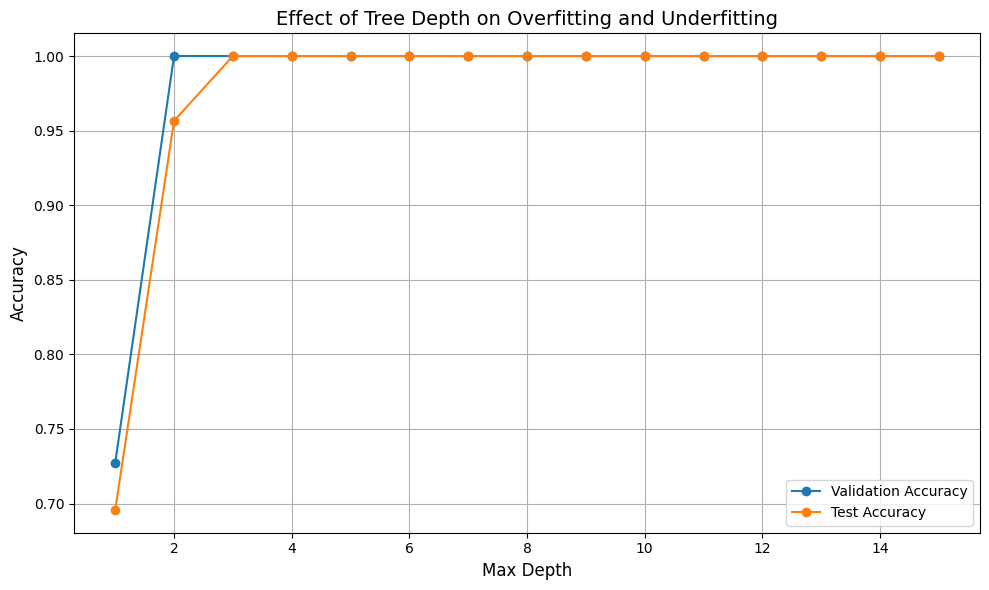

Best Max Depth: 2
Best Validation Accuracy: 1.00
Test Accuracy at Best Depth: 0.96


In [ ]:
# Decision Tree Depth Analysis

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Lists to store validation and test accuracies
val_accuracies = []
test_accuracies = []

# Range of maximum depths to evaluate
max_depths = range(1, 16)

# Train Decision Tree with different depths
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)  # Initialize model
    dt.fit(X_train, y_train)                                        # Train model

    # Predict and calculate accuracy on validation and test sets
    val_acc = accuracy_score(y_validation, dt.predict(X_validation))
    test_acc = accuracy_score(y_test, dt.predict(X_test))

    # Store accuracies
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

# Plot accuracies vs tree depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.title("Effect of Tree Depth on Overfitting and Underfitting", fontsize=14)
plt.xlabel("Max Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Report best depth and corresponding accuracies
best_depth = max_depths[np.argmax(val_accuracies)]
best_val_accuracy = max(val_accuracies)
best_test_accuracy = test_accuracies[np.argmax(val_accuracies)]

print(f"Best Max Depth: {best_depth}")
print(f"Best Validation Accuracy: {best_val_accuracy:.2f}")
print(f"Test Accuracy at Best Depth: {best_test_accuracy:.2f}")


<h1>Confusion Matrix for Test Data<h1>

Test Accuracy: 1.00


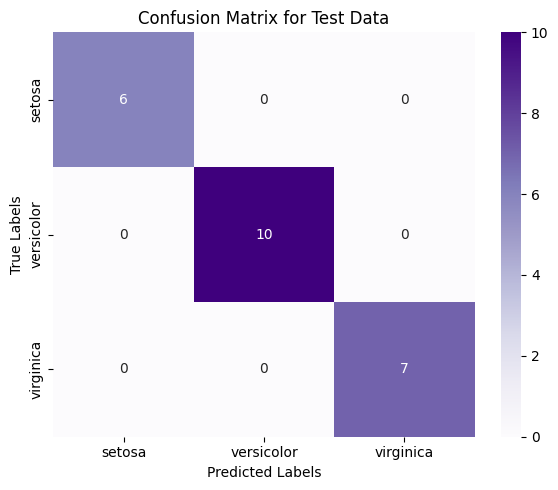

In [ ]:
# Confusion Matrix Visualization for Test Data

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data using the trained final model
y_predict_test = final_model.predict(X_test)

# Compute accuracy on test set
test_accuracy = accuracy_score(y_test, y_predict_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix, annot=True, fmt="d", cmap="Purples",
    xticklabels=iris.target_names, yticklabels=iris.target_names
)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


<h1>Logistic Regression with GridSearchCV<h1>

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.93
Test Accuracy: 1.00
Confusion Matrix:
 [[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]


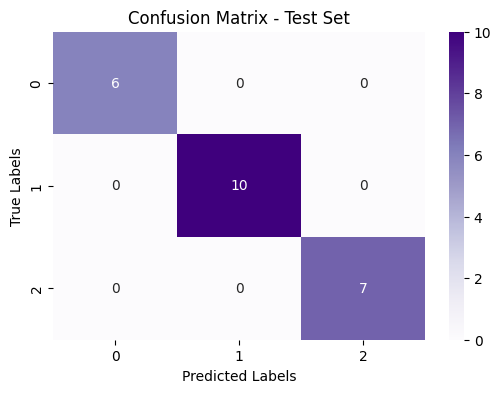

In [ ]:
# Logistic Regression with GridSearchCV and Confusion Matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into Train (70%), Validation (15%), and Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)
X_validation, X_test, y_validation, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Define Logistic Regression model
LogisticRegression_model = LogisticRegression(max_iter=200, random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # compatible with l1 and l2 penalties
}

# Setup and fit GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression_model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Get best hyperparameters and cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Predict and evaluate on test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples")
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


<h1>Comparison: Automatic vs Manual Logistic Regression<h1>

In [ ]:
# Comparison: Automatic vs Manual Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Automatic approach: using best_model from GridSearchCV
y_val_pred_auto = best_model.predict(X_val)      # Predict on validation set
val_accuracy_auto = accuracy_score(y_val, y_val_pred_auto)

y_test_pred_auto = best_model.predict(X_test)    # Predict on test set
test_accuracy_auto = accuracy_score(y_test, y_test_pred_auto)

print(f"Validation Accuracy (Auto): {val_accuracy_auto:.2f}")
print(f"Test Accuracy (Auto): {test_accuracy_auto:.2f}")

# Manual approach: manually selected hyperparameters
manual_model = LogisticRegression(
    C=1, penalty='l2', solver='liblinear', max_iter=300, random_state=42
)
manual_model.fit(X_train, y_train)  # Train manual model

y_val_pred_manual = manual_model.predict(X_val)  # Validation predictions
val_accuracy_manual = accuracy_score(y_val, y_val_pred_manual)

y_test_pred_manual = manual_model.predict(X_test)  # Test predictions
test_accuracy_manual = accuracy_score(y_test, y_test_pred_manual)

print(f"Validation Accuracy (Manual): {val_accuracy_manual:.2f}")
print(f"Test Accuracy (Manual): {test_accuracy_manual:.2f}")

# Comparison
print("\nComparison:")
print(f"Validation Accuracy - Auto: {val_accuracy_auto:.2f} vs Manual: {val_accuracy_manual:.2f}")
print(f"Test Accuracy - Auto: {test_accuracy_auto:.2f} vs Manual: {test_accuracy_manual:.2f}")

# Confusion Matrices
print("\nConfusion Matrices:")
print("\nConfusion Matrix (Auto - Test):")
print(confusion_matrix(y_test, y_test_pred_auto))
print("\nConfusion Matrix (Manual - Test):")
print(confusion_matrix(y_test, y_test_pred_manual))


Validation Accuracy (Auto): 0.89
Test Accuracy (Auto): 1.00
Validation Accuracy (Manual): 0.84
Test Accuracy (Manual): 0.87

Comparison:
Validation Accuracy - Auto: 0.89 vs Manual: 0.84
Test Accuracy - Auto: 1.00 vs Manual: 0.87

Confusion Matrices:

Confusion Matrix (Auto - Test):
[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]

Confusion Matrix (Manual - Test):
[[6 0 0]
 [0 7 3]
 [0 0 7]]
